In [8]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Data Files
mouse_drug_data = './data/mouse_drug_data.csv'
clinical_trial_data = './data/clinicaltrial_data.csv'

# Read in Files
mouse_drug = pd.read_csv(mouse_drug_data)
clinical_trial = pd.read_csv(clinical_trial_data)

print(mouse_drug.head())
print(mouse_drug.shape)
print(clinical_trial.head())
print(clinical_trial.shape)

# Merge datasets on 'Mouse ID'
data = pd.merge(mouse_drug, clinical_trial, on='Mouse ID')
print(data.head())
print(data.shape)

  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn
(250, 2)
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
(1893, 4)
  Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     f234  Stelasyn          0           45.000000                 0
1     f234  Stelasyn          5           47.313491                 0
2     f234  Stelasyn         10           47.904324                 0
3     f234  Stelasyn         15           48.735197                 1
4     f234  Stelasyn         20           51.112713                 2
(1906, 5)


### Tumor Response to Treatment

In [7]:
groups = data[['Drug','Timepoint','Tumor Volume (mm3)']].groupby(['Drug','Timepoint'])

mean_tumor_volume = groups.mean()
mean_tumor_volume.reset_index().head(15)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [26]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error = groups['Tumor Volume (mm3)'].sem()
std_error = std_error.reset_index()
std_error.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [55]:
# Reformat Data Frames
df = pd.pivot_table(mean_tumor_volume, index='Timepoint', columns='Drug')
df.columns = df.columns.get_level_values(1) # Flatten hierarchical index in columns
df.head()

# Limit analysis to only Capomulin, Infubinol, Ketapril, and Placebo
df_analysis = df[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
df_analysis.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


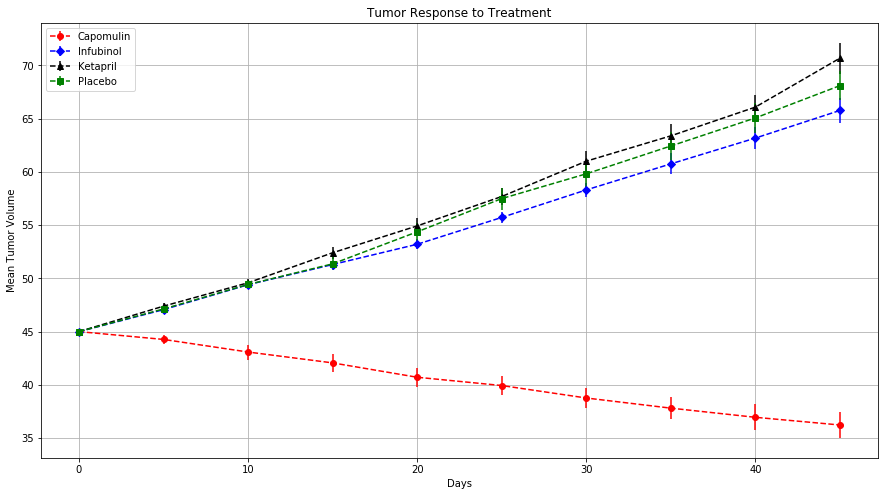

In [60]:
# Plot line graph with error bars
fig, ax = plt.subplots(figsize=(15,8))

x = df.index

graph_parameters = {
    'Capomulin':{'color':'r','marker':'o'},
    'Infubinol':{'color':'b','marker':'D'},
    'Ketapril':{'color':'k','marker':'^'},
    'Placebo':{'color':'g','marker':'s'}
}

for drug,params in graph_parameters.items():
    y = df[drug]
    yerr = std_error[std_error.Drug == drug]['Tumor Volume (mm3)']
    fmt=params['marker']+params['color']+'--'
    
    ax.errorbar(x, y, yerr=yerr, fmt=fmt)

ax.set(
    xlabel='Days',
    ylabel='Mean Tumor Volume',
    title='Tumor Response to Treatment'
)
ax.grid()

plt.legend(loc='upper left')
plt.show()